In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")
%matplotlib inline

In [120]:
xlsx = pd.ExcelFile('FracStats_JobList_Summer2017.xlsx')
df_stats = xlsx.parse('FracStats')

In [121]:
df_stats.head()

,Well,Formation,Basing,System,Fluid Type,Lateral [ft],TVD [ft],MD [ft],Stage [count],Screen Out,...,Phasing [deg],Perf Diameter [in],Perfs Open [count],Cluster Spacing [ft],Stage Spacing [ft],Perfs [area],Ball Size [in],Rate at Shift [bpm],Stage Length [ft],Well Section
0,P2,Niobrara,Denver-Julesburg,Sliding Sleeve,Gel,7104.0,6648.0,14124.0,1.0,No,...,NaN,NaN,NaN,NaN,TS,NaN,1.095,9.6,TS,Toe
1,P2,Niobrara,Denver-Julesburg,Sliding Sleeve,Gel,7104.0,6648.0,14124.0,2.0,No,...,NaN,NaN,NaN,NaN,193,NaN,1.15,11.9,193.52,Toe
2,P2,Niobrara,Denver-Julesburg,Sliding Sleeve,Gel,7104.0,6648.0,14124.0,3.0,No,...,NaN,NaN,NaN,NaN,197,NaN,1.205,11.9,196.87,Toe
3,P2,Niobrara,Denver-Julesburg,Sliding Sleeve,Gel,7104.0,6648.0,14124.0,4.0,No,...,NaN,NaN,NaN,NaN,197,NaN,1.26,11.9,197,Toe
4,P2,Niobrara,Denver-Julesburg,Sliding Sleeve,Gel,7104.0,6648.0,14124.0,5.0,No,...,NaN,NaN,NaN,NaN,197,NaN,1.315,11.8,196.77,Toe


In [122]:
df_stats['Screen Out'].value_counts()

No         1024
Cut          28
Skipped      12
Yes           6
Name: Screen Out, dtype: int64

Let's call unsucessful stages ones that Screened Out or were Cut.

In [123]:
unsuccess_df = df_stats.loc[(df_stats['Screen Out'] == 'Yes') | (df_stats['Screen Out'] == 'Cut')]

In [143]:
unsuccess_df.head()

,Well,Formation,Basing,System,Fluid Type,Lateral [ft],TVD [ft],MD [ft],Stage [count],Screen Out,...,Phasing [deg],Perf Diameter [in],Perfs Open [count],Cluster Spacing [ft],Stage Spacing [ft],Perfs [area],Ball Size [in],Rate at Shift [bpm],Stage Length [ft],Well Section
210,P8,Codell,Denver-Julesburg,Plug and Perf,Gel,NaN,6777.0,13872.0,1.0,Yes,...,NaN,NaN,NaN,NaN,TS,NaN,NaN,NaN,TS,Toe
265,P6,Niobrara,Denver-Julesburg,Sliding Sleeve,Gel,NaN,6701.0,13875.0,21.0,Cut,...,NaN,NaN,NaN,NaN,219,NaN,2.88,12.1,222,Heel
268,P6,Niobrara,Denver-Julesburg,Sliding Sleeve,Gel,NaN,6701.0,13875.0,24.0,Cut,...,NaN,NaN,NaN,NaN,259,NaN,3.155,12.32,262,Heel
272,P6,Niobrara,Denver-Julesburg,Sliding Sleeve,Gel,NaN,6701.0,13875.0,28.0,Cut,...,NaN,NaN,NaN,NaN,261,NaN,3.655,12.5,264,Heel
394,D2,Wolfcamp,Permian,Plug and Perf,Slickwater,NaN,7360.0,16567.0,8.0,Yes,...,NaN,NaN,NaN,98.0,98,NaN,NaN,NaN,300,Toe


In [124]:
print("{} unsuccessful stages across {} wells.".format(unsuccess_df.shape[0], len(unsuccess_df['Well'].unique())))

34 unsuccessful stages across 10 wells.


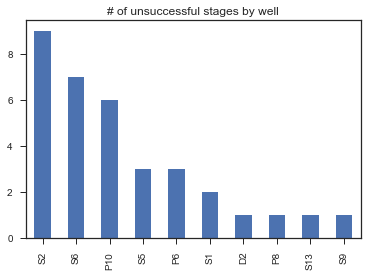

In [145]:
unsuccess_df['Well'].value_counts().plot.bar(title='# of unsuccessful stages by well');

What was different on these stages compared to the other stages of the well? We can really only make comparison within a well, and perhaps only within a formation. For each well we can plot up some statistics, but I'm guessing just lookig at the treatment schedule is going to be more telling than any statistics we can draw.

Let's go through these wells and compare successful stages to unsuccessful stages within the following wells. Honestly, this is an easier task in Excel so I'll be bouncing back and forth.

In [148]:
unsuccess_df['Well'].unique()

array(['P8', 'P6', 'D2', 'S1', 'S2', 'S5', 'S6', 'S9', 'S13', 'P10'], dtype=object)

## P8

In [157]:
P8_df = df_stats.loc[df_stats['Well'] == 'P8']
P8_df.head()

,Well,Formation,Basing,System,Fluid Type,Lateral [ft],TVD [ft],MD [ft],Stage [count],Screen Out,...,Phasing [deg],Perf Diameter [in],Perfs Open [count],Cluster Spacing [ft],Stage Spacing [ft],Perfs [area],Ball Size [in],Rate at Shift [bpm],Stage Length [ft],Well Section
210,P8,Codell,Denver-Julesburg,Plug and Perf,Gel,NaN,6777.0,13872.0,1.0,Yes,...,NaN,NaN,NaN,NaN,TS,NaN,NaN,NaN,TS,Toe
211,P8,Codell,Denver-Julesburg,Plug and Perf,Gel,NaN,6777.0,13872.0,2.0,Skipped,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Toe
212,P8,Codell,Denver-Julesburg,Plug and Perf,Gel,NaN,6777.0,13872.0,3.0,Skipped,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Toe
213,P8,Codell,Denver-Julesburg,Plug and Perf,Gel,NaN,6777.0,13872.0,4.0,Skipped,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Toe
214,P8,Codell,Denver-Julesburg,Plug and Perf,Gel,NaN,6777.0,13872.0,5.0,Skipped,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Toe


Lots and lots of columns to look at. Let's use some domain expertise and narrow it down to a reasonable number.

In [163]:
select_cols = ['Screen Out', 'Avg TP [psi]', 'Avg Rate [bpm]', 'Clean Volume [bbl]', 
               'Total Proppant [lbs].1', 'Avg Prop Conc [ppa]', 'Max Prop Conc [ppa]']

In [165]:
P8_df[select_cols]

,Screen Out,Avg TP [psi],Avg Rate [bpm],Clean Volume [bbl],Total Proppant [lbs].1,Avg Prop Conc [ppa],Max Prop Conc [ppa]
210,Yes,7469.0,37.2,2104.976190,31146.0,NaN,NaN
211,Skipped,NaN,NaN,NaN,NaN,NaN,NaN
212,Skipped,NaN,NaN,NaN,NaN,NaN,NaN
213,Skipped,NaN,NaN,NaN,NaN,NaN,NaN
214,Skipped,NaN,NaN,NaN,NaN,NaN,NaN
215,No,5261.0,40.0,8142.119048,536936.0,NaN,NaN
216,No,5805.0,42.0,4322.738095,232592.0,NaN,NaN
217,No,5710.0,40.0,4194.785714,231655.0,NaN,NaN
218,No,5484.0,50.0,3892.857143,208809.0,NaN,NaN
219,No,5423.0,50.0,3017.976190,198654.0,NaN,NaN
